In [60]:
import pandas as pd

In [61]:
df1 = pd.read_csv("../data/task1/train_data.csv")

df1.columns


Index(['Unnamed: 0', 'ID ', ' TITLE ', ' GENRE ', ' DESCRIPTION'], dtype='object')

In [62]:
df1 = df1.drop(['Unnamed: 0'], axis=1)
df1.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [63]:
new_column_names = {
    'ID ': 'ID',
    ' TITLE ': 'TITLE',
    ' GENRE ': 'GENRE',
    ' DESCRIPTION': 'DESCRIPTION'
}

df1_renamed = df1.rename(columns=new_column_names)

In [64]:
df2 = pd.read_csv('../data/task1/test_data.csv')
df2 = df2.drop(['Unnamed: 0'],axis=1)
df2.columns

Index(['ID ', ' TITLE ', ' DESCRIPTION'], dtype='object')

In [65]:
new_column_names = {
    'ID ': 'ID',
    ' TITLE ': 'TITLE',
    ' DESCRIPTION': 'DESCRIPTION'
}

df2_renamed = df2.rename(columns=new_column_names)

In [66]:
df3 = pd.read_csv('../data/task1/test_data_sol.csv')
df3 = df3.drop(['Unnamed: 0'],axis=1)
df3.columns

Index(['ID ', ' TITLE ', ' GENRE ', ' DESCRIPTION'], dtype='object')

In [67]:
new_column_names = {
    'ID ': 'ID',
    ' TITLE ': 'TITLE',
    ' GENRE ': 'GENRE',
    ' DESCRIPTION': 'DESCRIPTION'
}

df3_renamed = df3.rename(columns=new_column_names)

In [68]:
df1_renamed.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [69]:
df2_renamed.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [70]:
df3_renamed.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [71]:
print(df1_renamed.isna().sum())
print(df2_renamed.isna().sum())
print(df3_renamed.isna().sum())

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64
ID             0
TITLE          0
DESCRIPTION    0
dtype: int64
ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [72]:
x_train = df1_renamed.drop(['GENRE'],axis=1)
y_train = df1_renamed['GENRE']
x_test = df2_renamed
y_test = df3_renamed['GENRE']

In [73]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(54214, 3)
(54214,)
(54200, 3)
(54200,)


In [76]:
x_train = x_train.drop(['ID'],axis=1)
x_test = x_test.drop(['ID'],axis=1)

In [78]:
x_train['Combined Title and Description'] = x_train['TITLE'] + x_train['DESCRIPTION']
X_train = x_train['Combined Title and Description']

In [79]:
x_test['Combined Title and Description'] = x_test['TITLE'] + x_test['DESCRIPTION']
x_test = x_test['Combined Title and Description']

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
mov_clf1 = Pipeline([('tfidf', TfidfVectorizer()), ('clf',MultinomialNB())])
mov_clf1.fit(X_train,y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [82]:
pred_using_NB = mov_clf1.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy_NB = accuracy_score(y_test, pred_using_NB)
accuracy_NB

0.4422509225092251

<Axes: >

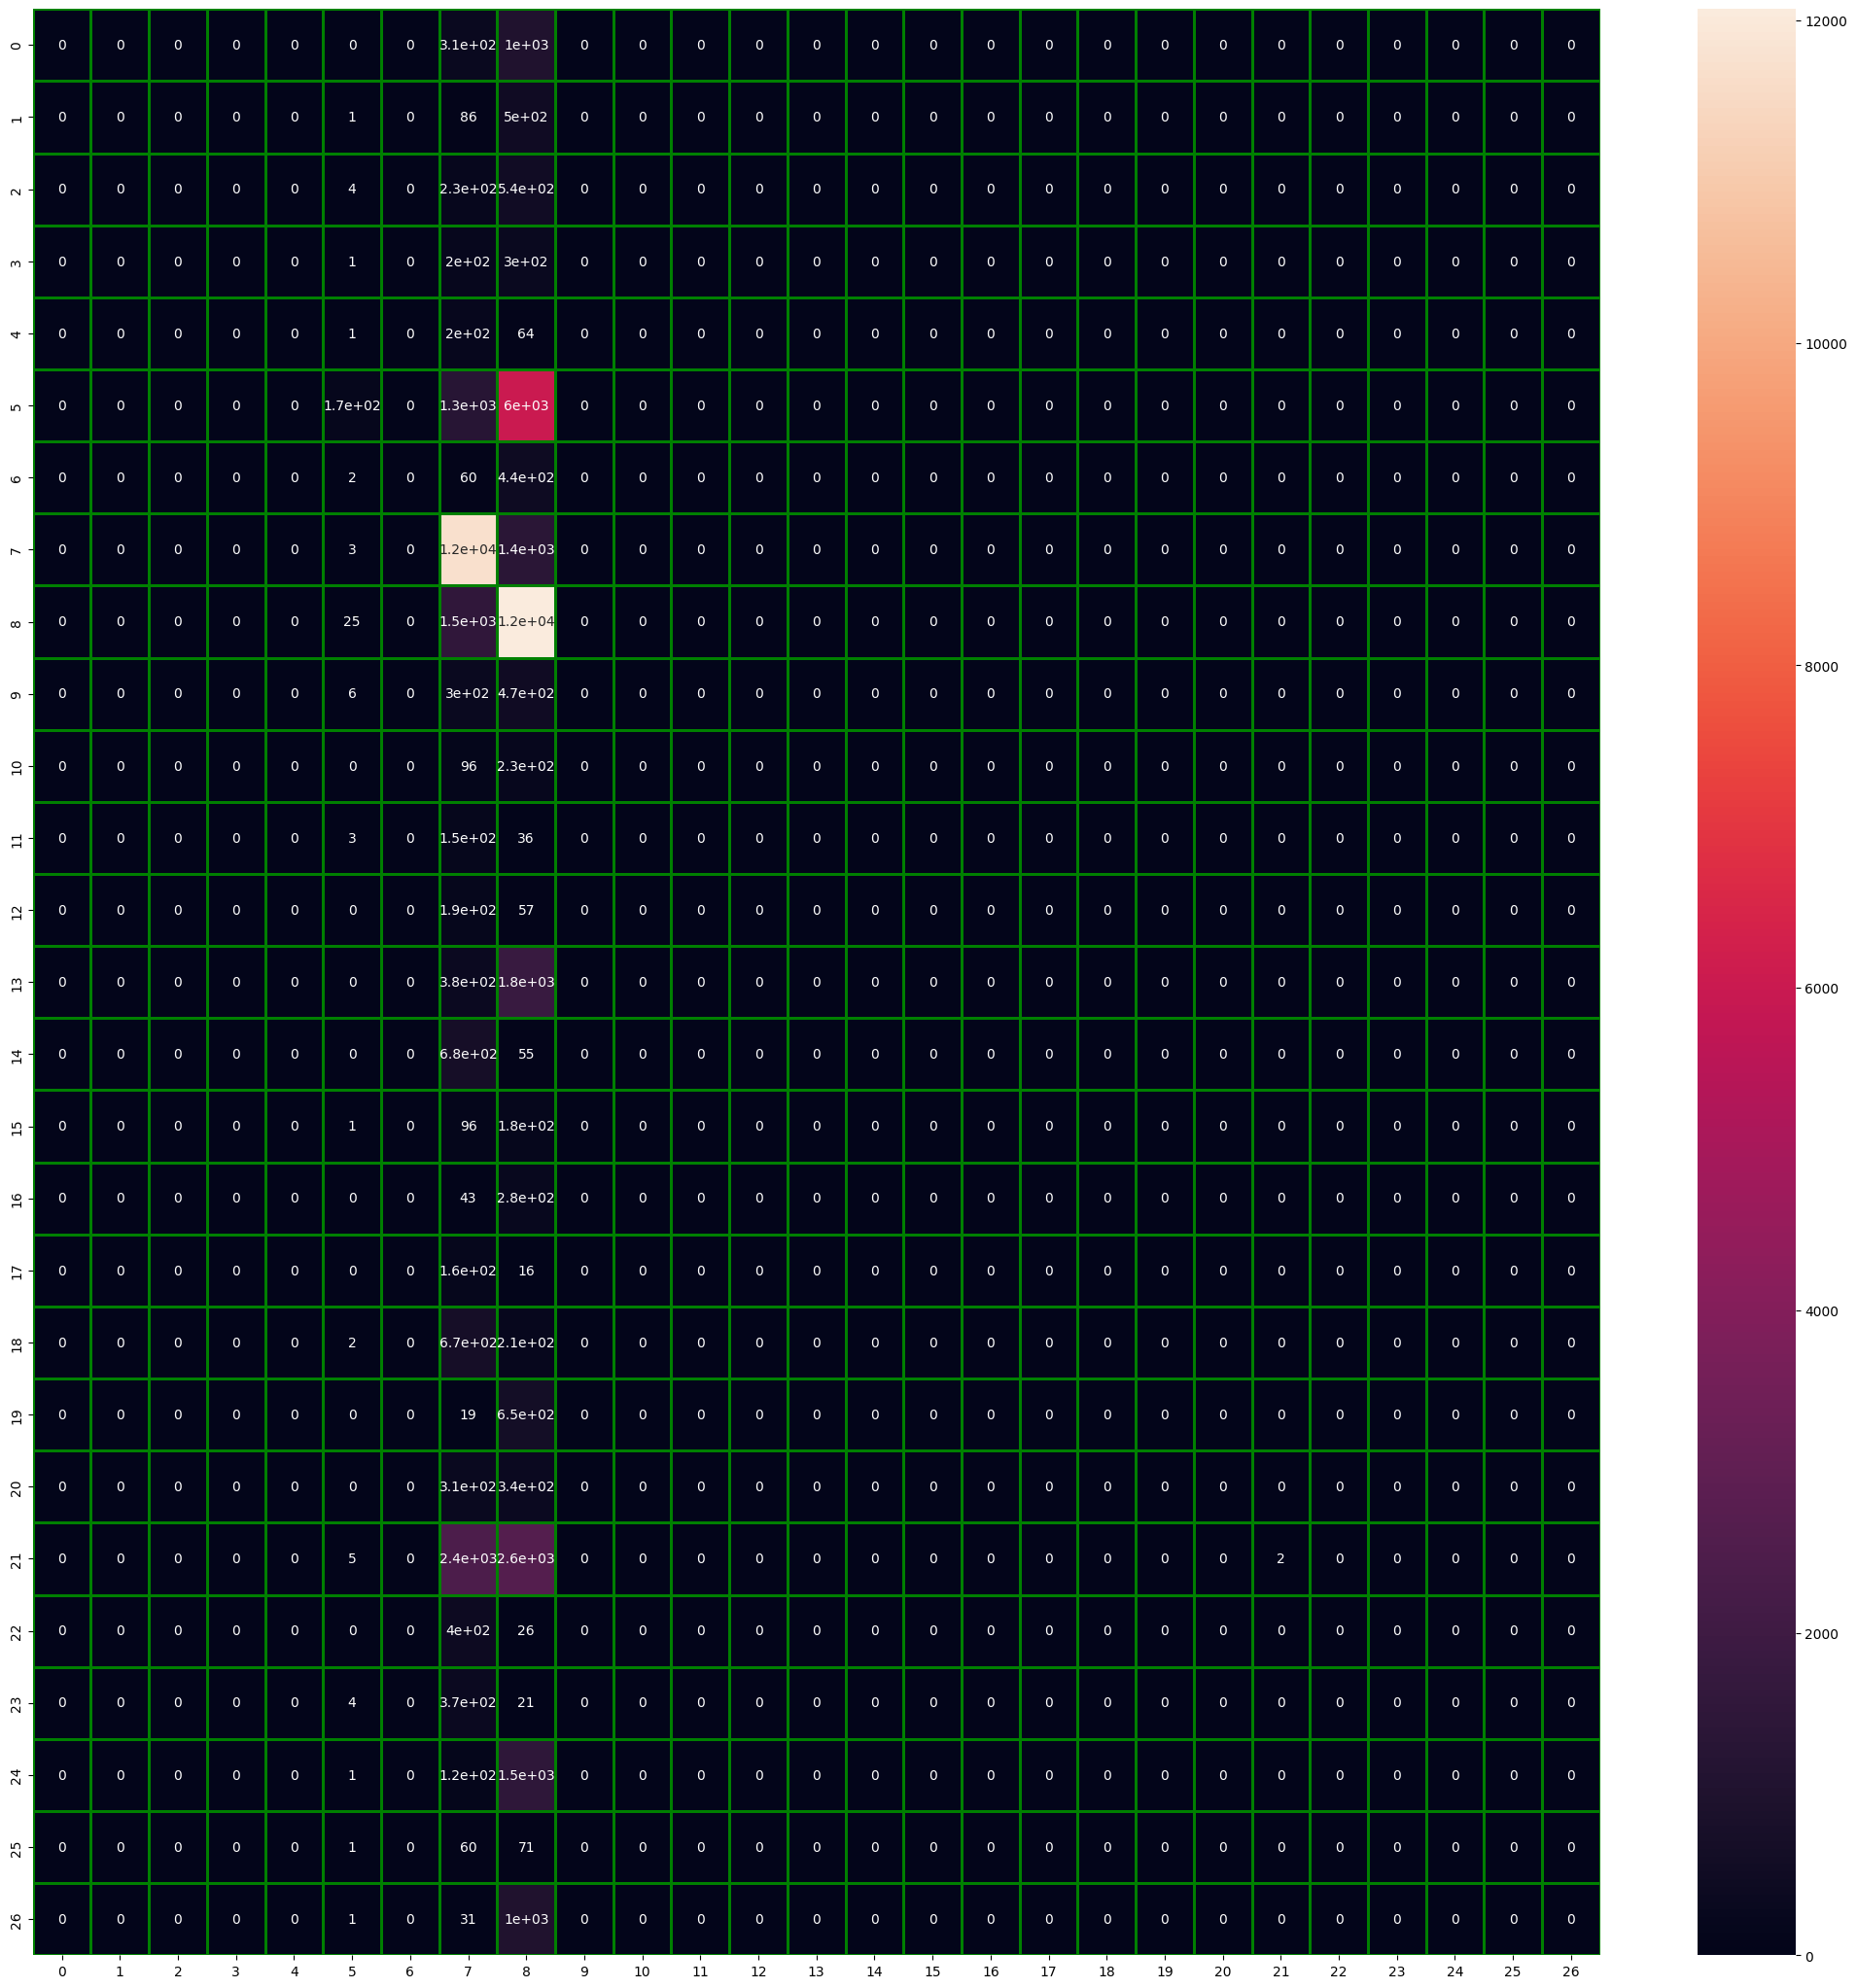

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(26,26))
sns.heatmap(confusion_matrix(y_test,pred_using_NB), annot=True, cbar=True, linewidths='1', linecolor='green')

In [87]:
print(classification_report(y_test,pred_using_NB))

/home/archit/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/archit/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00      1314
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.73      0.02      0.04      7446
       crime        0.00      0.00      0.00       505
 documentary        0.53      0.90      0.67     13096
       drama        0.38      0.89      0.53     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.00      0.00      0.00      2204
       music        0.00      0.00      0.00       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00      0.00       318
        n

/home/archit/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
from sklearn.linear_model import LogisticRegression

mov_reg1 = Pipeline([('tfidf', TfidfVectorizer()), ('reg',LogisticRegression(multi_class="multinomial",solver="lbfgs"))])
mov_reg1.fit(X_train,y_train)

/home/archit/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('reg', LogisticRegression(multi_class='multinomial'))])

In [90]:
pred_using_LR = mov_reg1.predict(x_test)
accuracy_LR = accuracy_score(y_test,pred_using_LR)
accuracy_LR

0.5993726937269372

<Axes: >

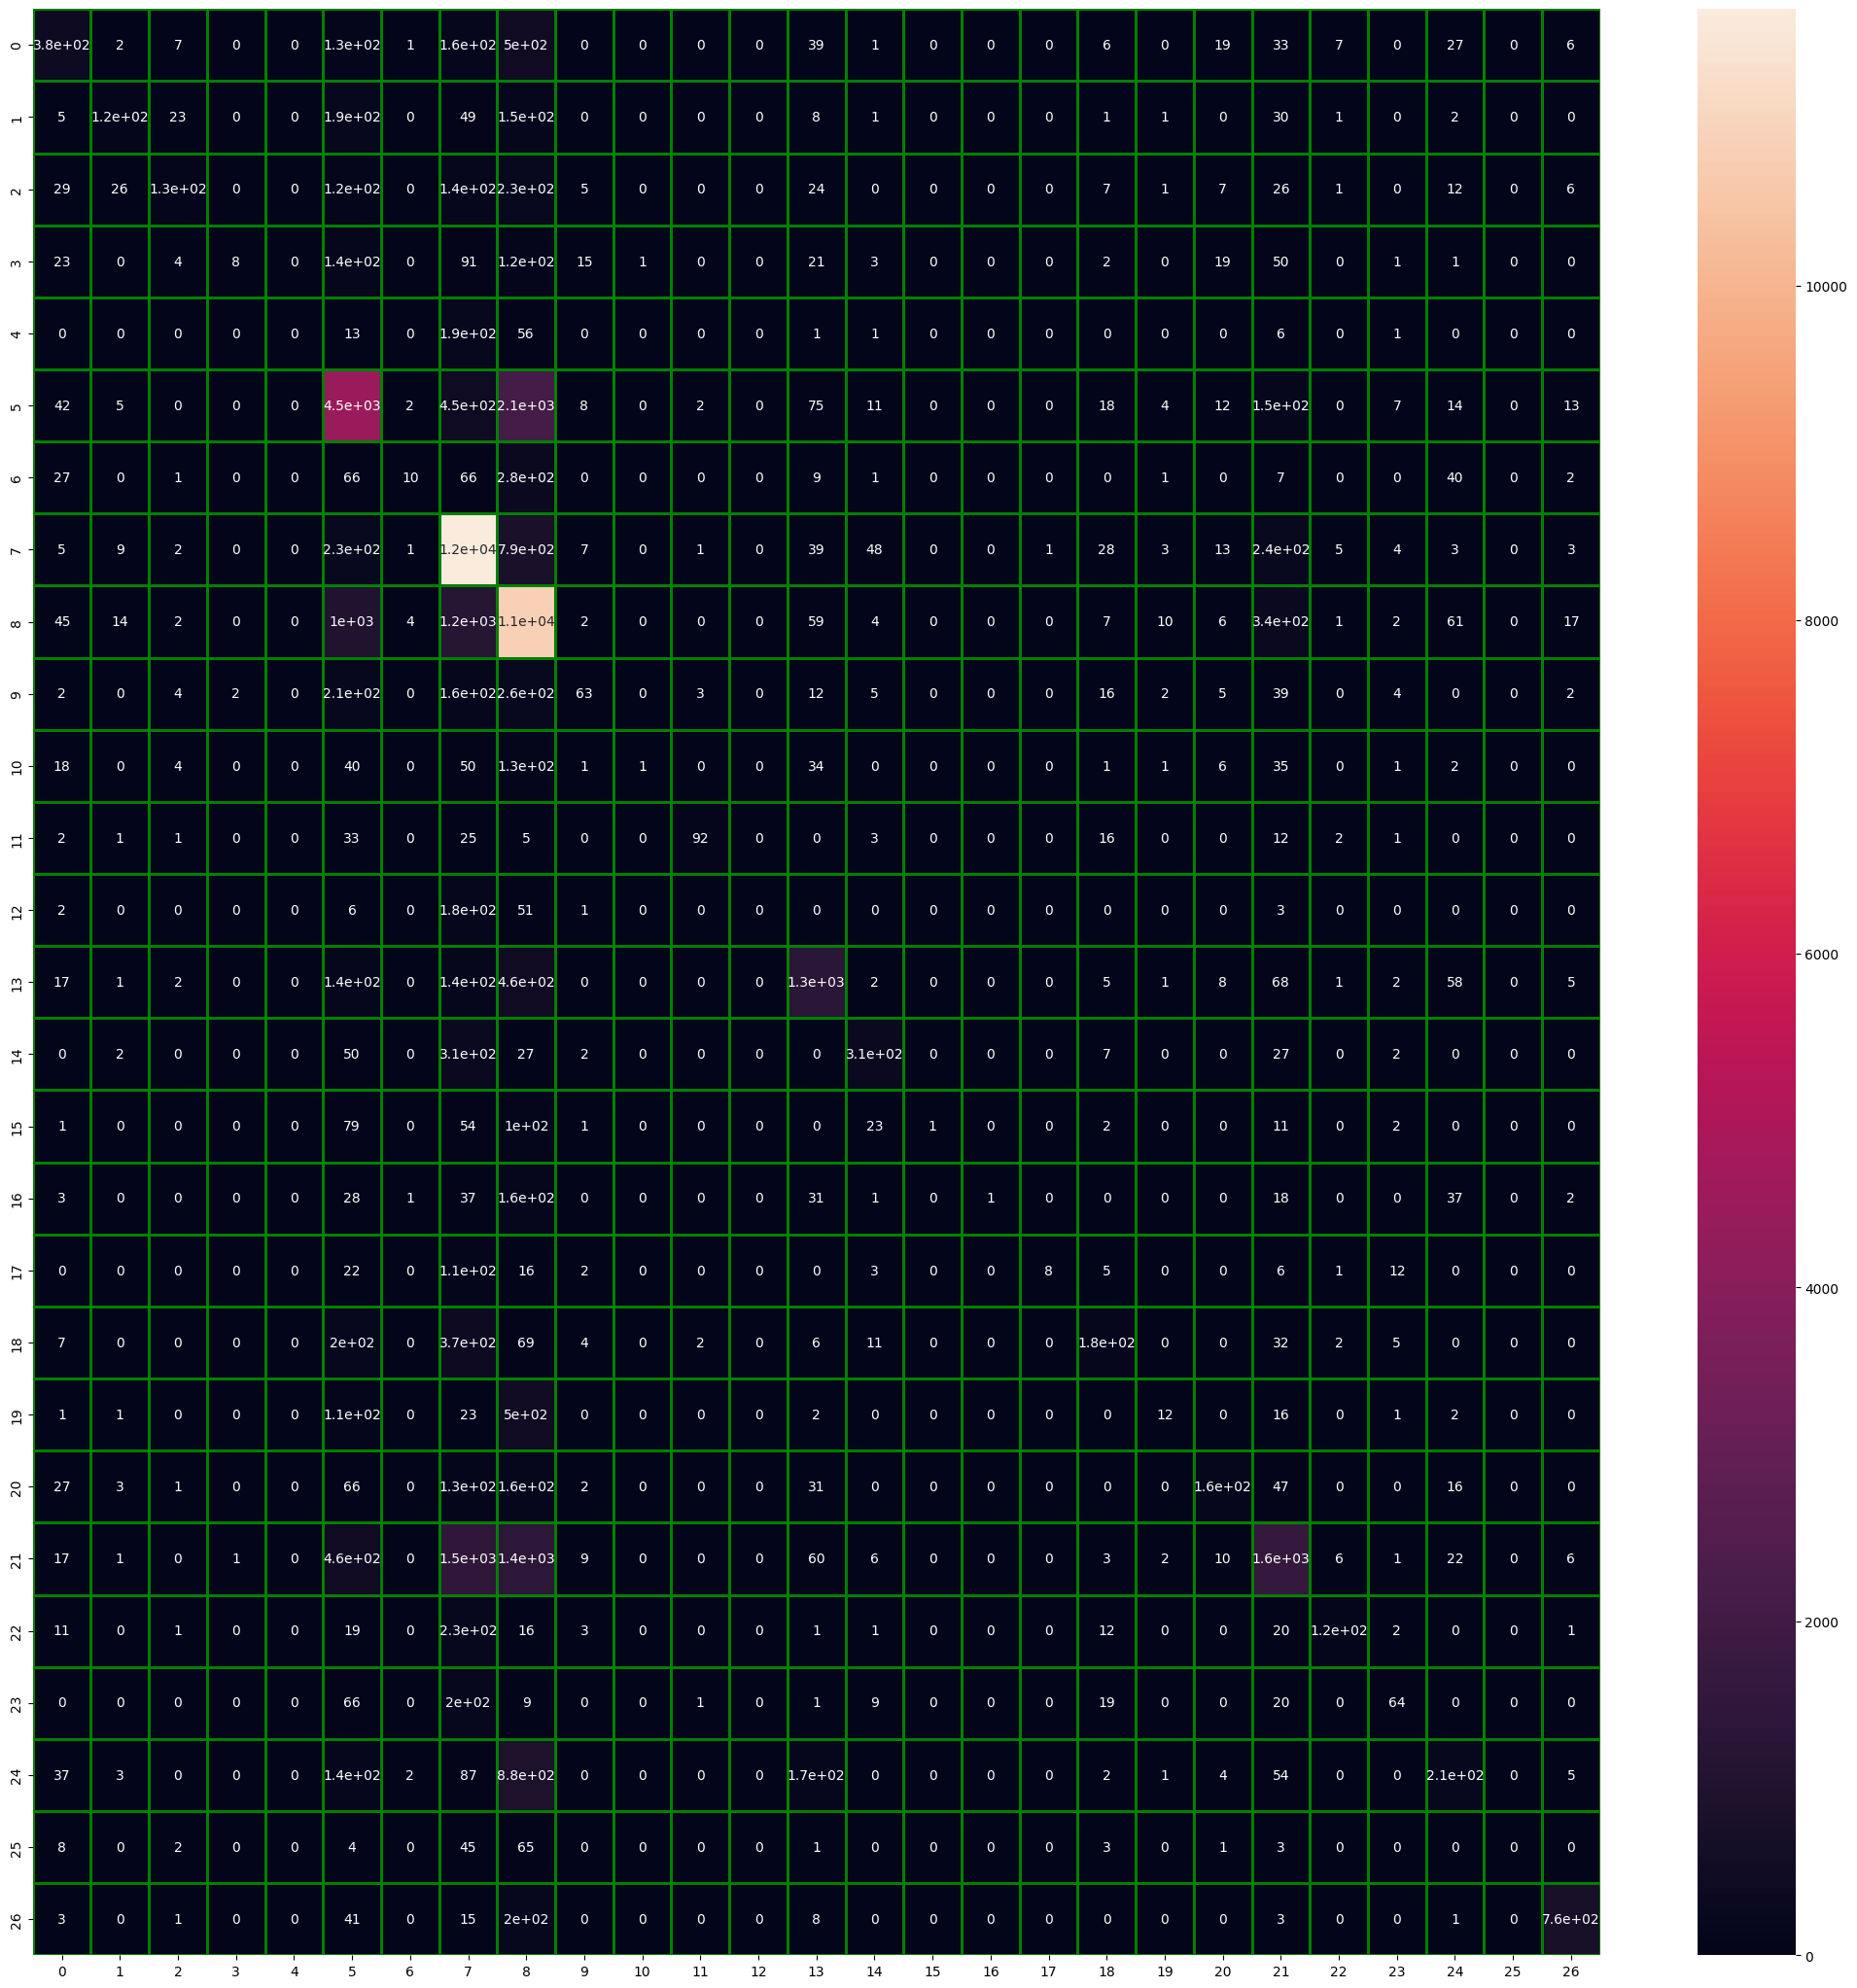

In [91]:
plt.figure(figsize=(26,26))
sns.heatmap(confusion_matrix(y_test,pred_using_LR),annot=True,cbar=True,linewidths='1',linecolor='green')

In [93]:
print(classification_report(y_test,pred_using_LR))

/home/archit/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/archit/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.53      0.29      0.37      1314
       adult        0.65      0.21      0.32       590
   adventure        0.71      0.17      0.28       775
   animation        0.73      0.02      0.03       498
   biography        0.00      0.00      0.00       264
      comedy        0.55      0.60      0.58      7446
       crime        0.48      0.02      0.04       505
 documentary        0.66      0.89      0.76     13096
       drama        0.55      0.79      0.65     13612
      family        0.50      0.08      0.14       783
     fantasy        0.50      0.00      0.01       322
   game-show        0.91      0.48      0.63       193
     history        0.00      0.00      0.00       243
      horror        0.67      0.59      0.63      2204
       music        0.70      0.42      0.52       731
     musical        1.00      0.00      0.01       276
     mystery        1.00      0.00      0.01       318
        n

/home/archit/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
from sklearn.svm import LinearSVC
mov_clf2 = Pipeline([('tfidf', TfidfVectorizer()), ('clf',LinearSVC())])
mov_clf2.fit(X_train,y_train)

/home/archit/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [95]:
pred_using_SVM = mov_clf2.predict(x_test)
accuracy_SVM = accuracy_score(y_test,pred_using_SVM)
accuracy_SVM

0.6018265682656827

<Axes: >

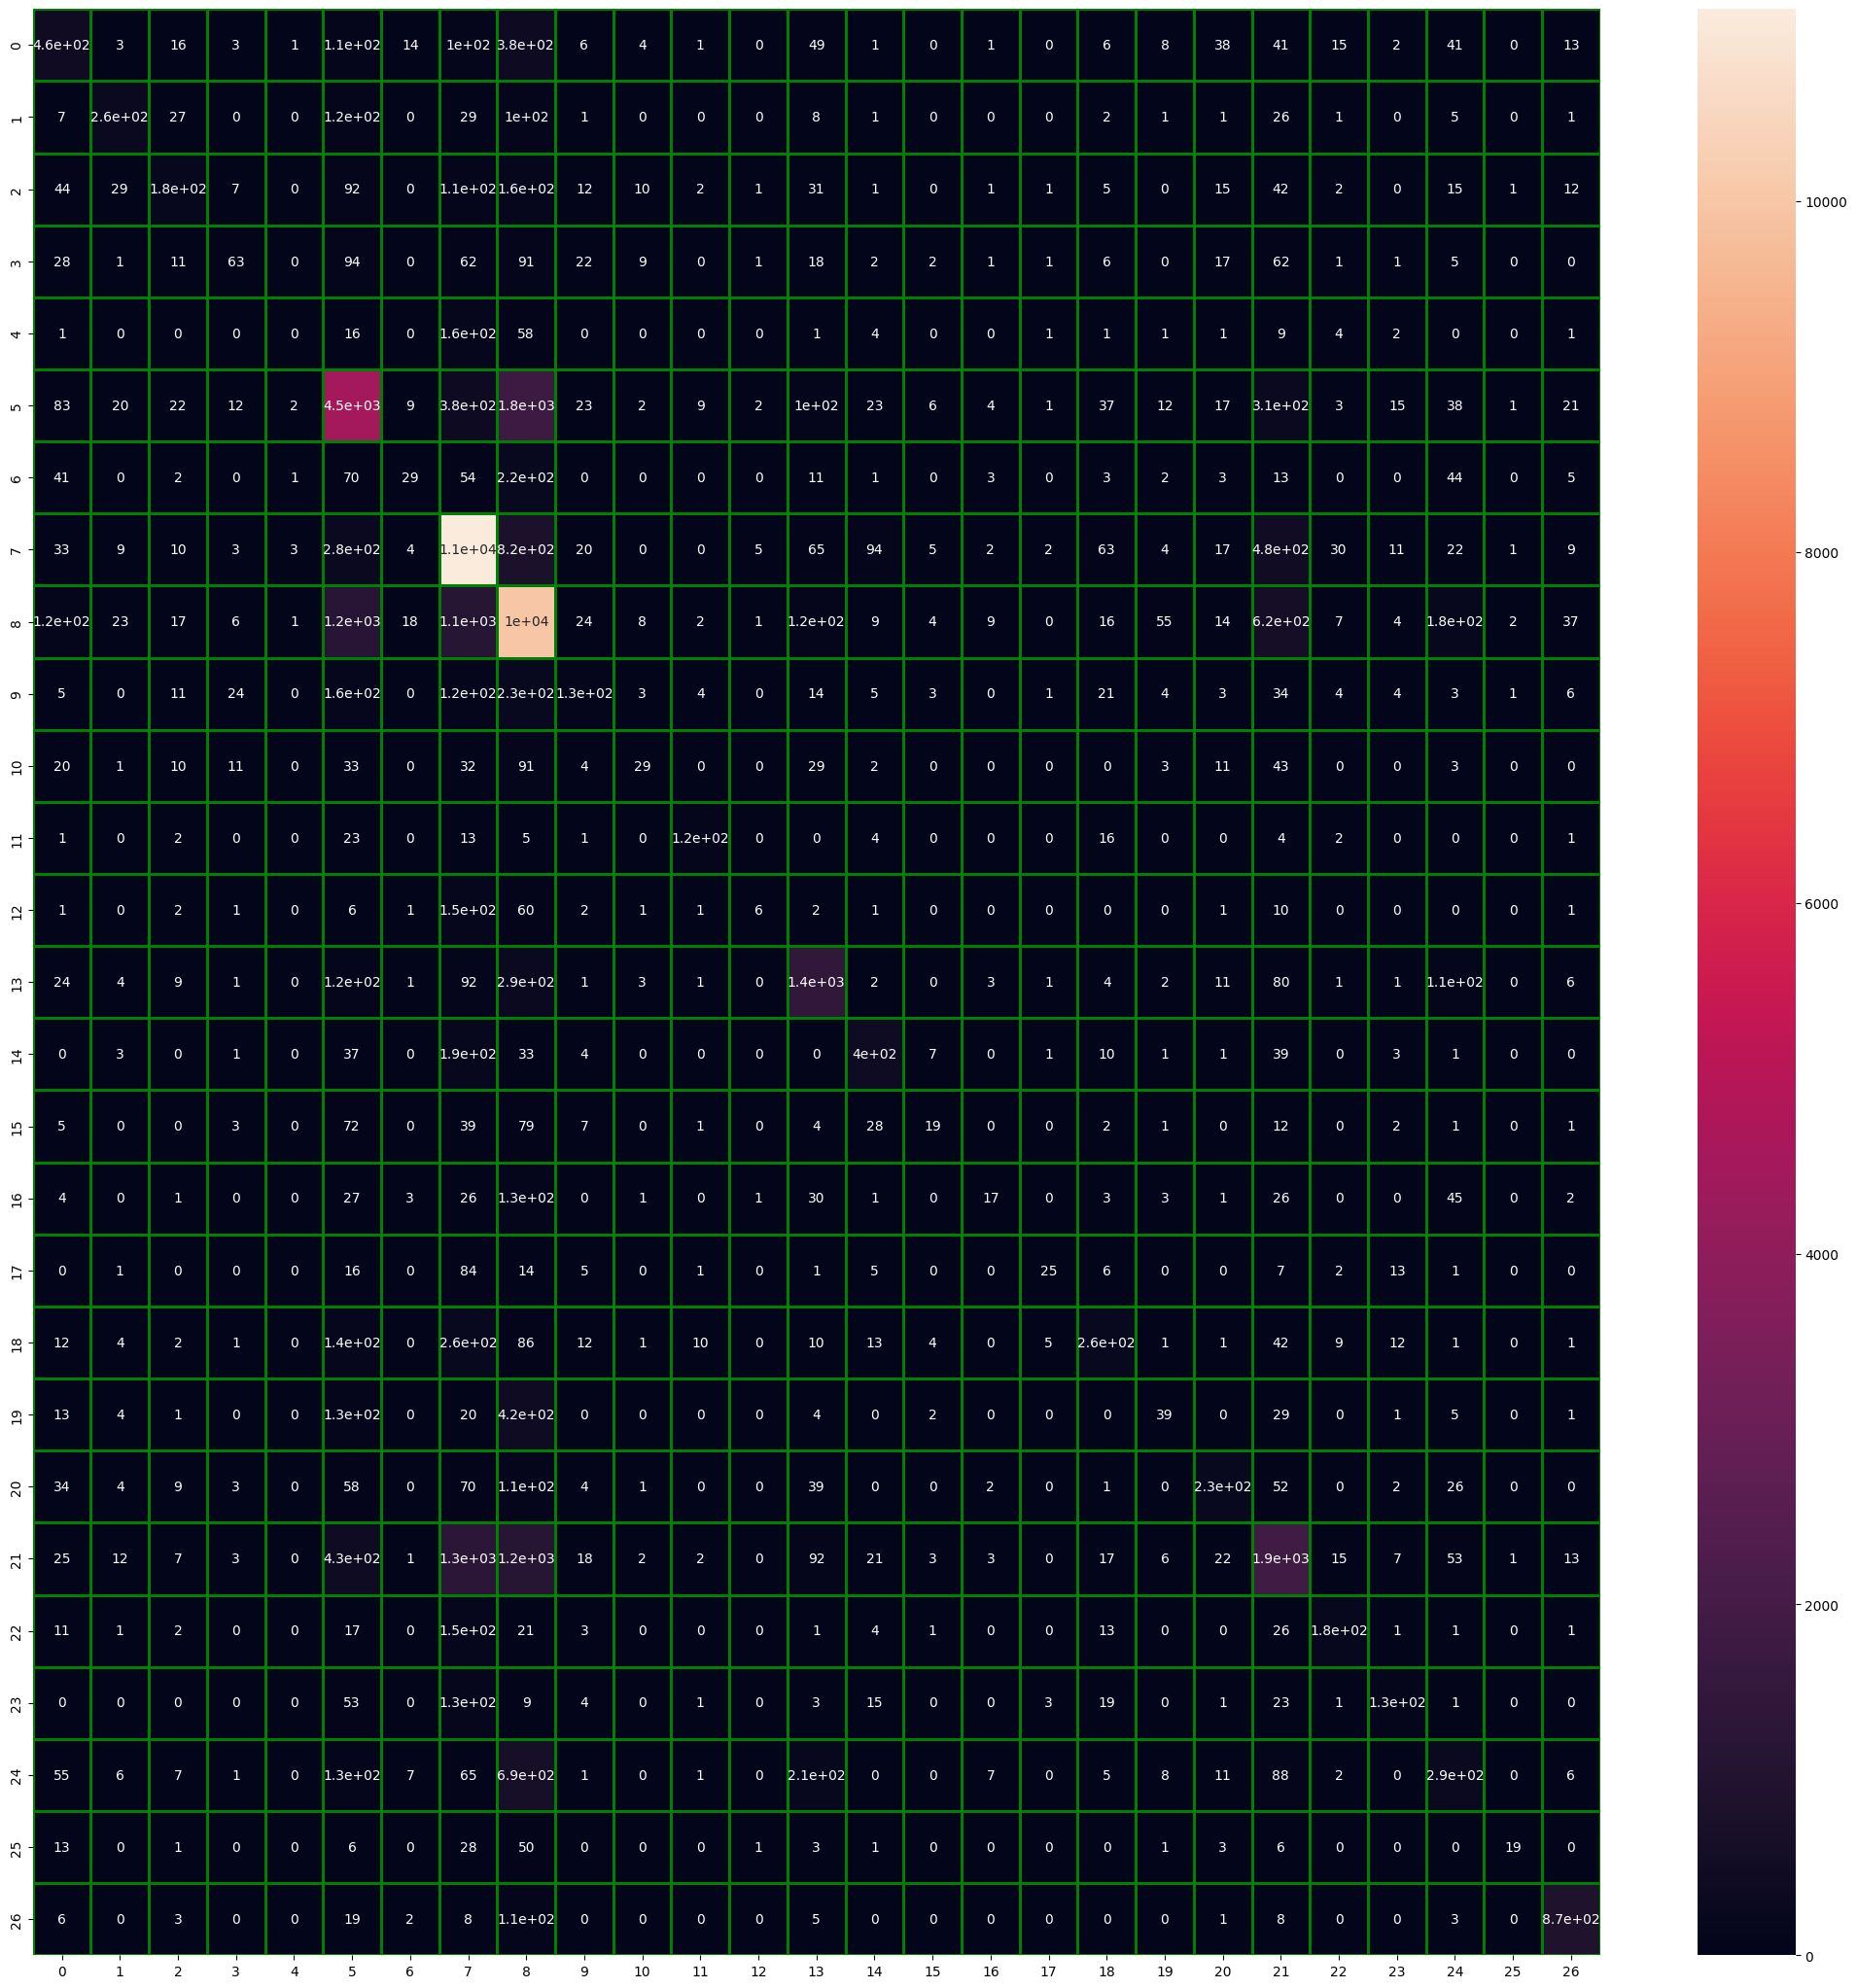

In [96]:
plt.figure(figsize=(26,26))
sns.heatmap(confusion_matrix(y_test,pred_using_SVM),annot=True,cbar=True,linewidths='1',linecolor='green')

In [97]:
print(classification_report(y_test,pred_using_SVM))

               precision    recall  f1-score   support

      action        0.44      0.35      0.39      1314
       adult        0.68      0.44      0.54       590
   adventure        0.52      0.24      0.33       775
   animation        0.44      0.13      0.20       498
   biography        0.00      0.00      0.00       264
      comedy        0.57      0.60      0.58      7446
       crime        0.33      0.06      0.10       505
 documentary        0.70      0.85      0.77     13096
       drama        0.58      0.73      0.65     13612
      family        0.42      0.16      0.23       783
     fantasy        0.39      0.09      0.15       322
   game-show        0.77      0.63      0.69       193
     history        0.33      0.02      0.05       243
      horror        0.63      0.65      0.64      2204
       music        0.63      0.55      0.59       731
     musical        0.34      0.07      0.11       276
     mystery        0.32      0.05      0.09       318
        n